In [1]:
import neuron_gen as ng
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
gen_methods = (ng.genNeuronsV1, ng.genNeuronsV2, ng.genNeuronsV3)

In [3]:
help(ng.genNeuronsV2)

Help on function genNeuronsV2 in module neuron_gen:

genNeuronsV2(num_of_neurons: int, num_of_regions: int = 8, max_connection_bias: float = 1.0, max_error: float = 0.2, max_adjacent: int = 500, bench_mark: bool = False)
    # W/ tuple



In [4]:
def bench_marker(times, func, **kwargs):
    res = np.empty(times)
    for i in range(times):
        s = time.perf_counter()
        func(**kwargs)
        res[i] = time.perf_counter() - s
    return res.sum() / times

In [5]:
kwargs = {"num_of_neurons": 100_000, "max_adjacent": 10, "bench_mark": True}
print(kwargs)

{'num_of_neurons': 100000, 'max_adjacent': 10, 'bench_mark': True}


In [6]:
gap = np.arange(100, 600, 100)

In [7]:
gap.size

5

In [8]:
data = np.empty((4, gap.size), dtype=float)

In [9]:
data[0] = gap

In [10]:
s = time.perf_counter()
for i in range (1, 4):
    for j in range(gap.size):
        data[i, j] = bench_marker(10, gen_methods[i - 1], **{"num_of_neurons": 100_000, "max_adjacent": gap[j], "bench_mark": True})
print(f"Time to benchmark: {time.perf_counter() - s}")

Time to benchmark: 557.3848570000009


In [11]:
data

array([[100.        , 200.        , 300.        , 400.        ,
        500.        ],
       [  2.2805211 ,   3.3863956 ,   3.91387211,   3.94958137,
          4.21468508],
       [  3.52520485,   3.48111056,   3.76939432,   3.96791303,
          4.38796394],
       [  3.47704247,   3.66390421,   3.88366582,   3.86691197,
          3.97004375]])

In [12]:
np.savetxt("bench_mark_res.csv", data, delimiter=",")

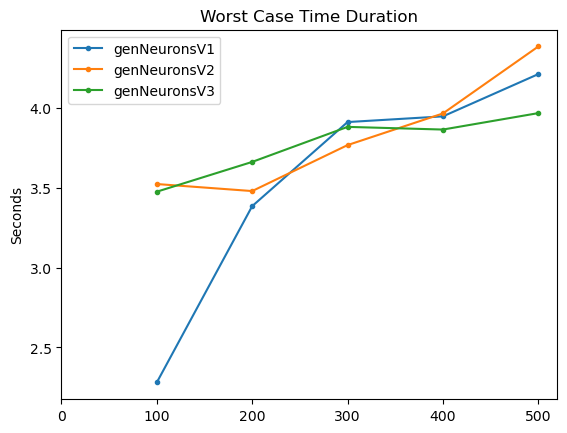

In [13]:
plt.title("Worst Case Time Duration")

plt.plot(data[0], data[1], '.-', label="genNeuronsV1")
plt.plot(data[0], data[2], '.-',label="genNeuronsV2")
plt.plot(data[0], data[3], '.-',label="genNeuronsV3")


plt.ylabel("Seconds")
plt.legend()
plt.xticks(np.arange(0, 600, 100))

plt.show()